In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


(array([7.0000e+00, 1.4400e+02, 2.0840e+03, 1.3399e+04, 3.3346e+04,
        3.1485e+04, 1.5957e+04, 3.2620e+03, 3.0500e+02, 1.0000e+01,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.9000e+01, 2.6900e+02, 1.6380e+03, 7.4730e+03, 1.6725e+04,
        2.7719e+04, 2.5211e+04, 1.3885e+04, 5.6140e+03, 1.2560e+03,
        1.6200e+02, 1.5000e+01, 3.0000e+00, 0.0000e+00, 3.0000e+00,
        1.7000e+01, 1.3700e+02, 9.6200e+02, 3.9080e+03, 9.4960e+03,
        1.9366e+04, 2.4787e+04, 2.0369e+04, 1.3437e+04, 5.3510e+03,
        1.7560e+03, 3.7200e+02, 3.8000e+01, 1.0000e+00, 0.0000e+00,
        7.0000e+00, 5.9000e+01, 3.9500e+02, 1.6320e+03, 5.3520e+03,
        1.2529e+04, 1.8398e+04, 2.3453e+04, 1.9557e+04, 1.1134e+04,
        5.4280e+03, 1.6400e+03, 3.4500e+02, 5.8000e+01, 1.3000e+01]),
 array([0.068   , 0.074325, 0.08065 , 0.086975, 0.0933  , 0.099625,
        0.10595 , 0.112275, 0.1186  , 0.124925, 0.13125 , 0.137575,
        0.1439  , 0.150225, 0.15655 , 0.162875

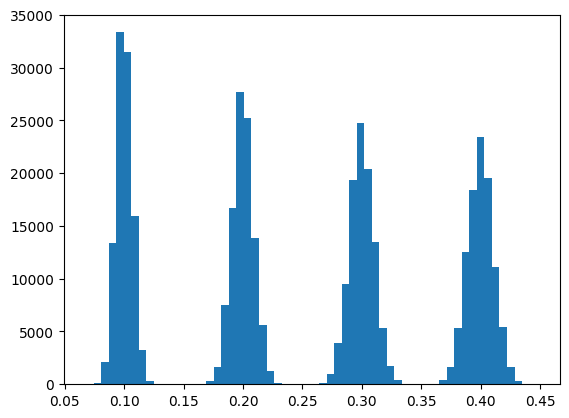

In [76]:
N = 2000

probs = [0.1, 0.2, 0.3, 0.4]

P = np.cumsum(probs)


def x():
    v = np.random.random(N)
    # A = v < 0.1
    # B = ~A & (v < 0.3)
    # C = ~A & ~B & (v < 0.6)

    # return A.sum()/N, B.sum()/N, C.sum()/N
    
    prev = 0
    out = []
    for p in P:
        p1 = (v < p).sum()
        out.append(p1-prev)
        prev = p1
    return np.array(out)/N


y = np.array([x() for _ in range(100000)]).flatten()
# plt.hist(y)
plt.hist(y, bins=60)

(array([5.8000e+01, 1.2060e+03, 8.1620e+03, 2.7747e+04, 3.4427e+04,
        2.1865e+04, 5.5570e+03, 9.1700e+02, 5.5000e+01, 6.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e+00,
        8.9000e+01, 7.1100e+02, 4.1160e+03, 1.1542e+04, 2.3821e+04,
        2.6247e+04, 2.0930e+04, 9.0220e+03, 2.8980e+03, 5.4900e+02,
        6.4000e+01, 4.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00,
        4.4000e+01, 3.2600e+02, 1.7200e+03, 5.3150e+03, 1.3719e+04,
        2.0411e+04, 2.4732e+04, 1.7731e+04, 1.0836e+04, 3.8210e+03,
        1.1070e+03, 2.0100e+02, 3.0000e+01, 4.0000e+00, 2.0000e+00,
        1.0000e+01, 1.0100e+02, 4.8700e+02, 2.3020e+03, 6.0570e+03,
        1.3632e+04, 1.9168e+04, 2.3316e+04, 1.7352e+04, 1.1174e+04,
        4.4320e+03, 1.5590e+03, 3.3600e+02, 6.3000e+01, 9.0000e+00]),
 array([145.        , 157.51666667, 170.03333333, 182.55      ,
        195.06666667, 207.58333333, 220.1       , 232.61666667,
        245.13333333, 257.65      , 270.16666667, 282.

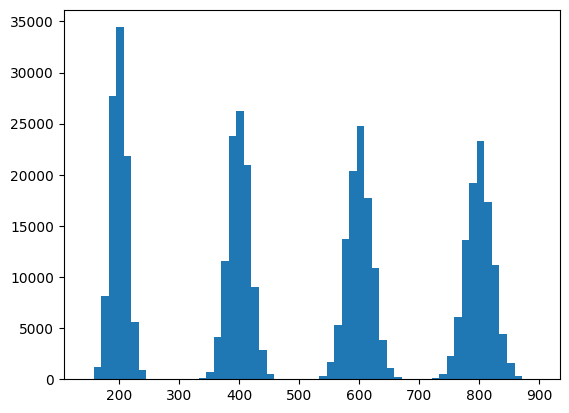

In [55]:
def random_partition(rel_probabilities: npt.ArrayLike, count: int) -> npt.NDArray:
    random_vals = np.random.random(count)
    distr = np.cumsum(rel_probabilities)
    distr /= distr[-1]
    return np.diff([0] + [np.sum(random_vals < threshold) for threshold in distr])


plt.hist(np.array([random_partition([1.0,2,3,4],2000) for _ in range(100000)]).flatten(), bins=60)

(array([2.0000e+01, 4.1200e+02, 4.8680e+03, 1.8652e+04, 3.6632e+04,
        2.8194e+04, 9.6130e+03, 1.4750e+03, 1.3100e+02, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00,
        5.7000e+01, 5.9400e+02, 3.0540e+03, 1.1290e+04, 2.3341e+04,
        2.8382e+04, 1.9720e+04, 1.0063e+04, 2.9230e+03, 5.0800e+02,
        5.7000e+01, 6.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        4.8000e+01, 3.5800e+02, 1.8910e+03, 6.4060e+03, 1.5011e+04,
        2.1216e+04, 2.4691e+04, 1.7675e+04, 8.4490e+03, 3.3420e+03,
        7.6500e+02, 1.3000e+02, 1.5000e+01, 0.0000e+00, 5.0000e+00,
        2.2000e+01, 1.8300e+02, 9.5900e+02, 3.6680e+03, 8.4270e+03,
        1.6940e+04, 2.2822e+04, 2.0206e+04, 1.5576e+04, 7.6280e+03,
        2.7110e+03, 6.9400e+02, 1.3900e+02, 1.8000e+01, 2.0000e+00]),
 array([140.        , 152.71666667, 165.43333333, 178.15      ,
        190.86666667, 203.58333333, 216.3       , 229.01666667,
        241.73333333, 254.45      , 267.16666667, 279.

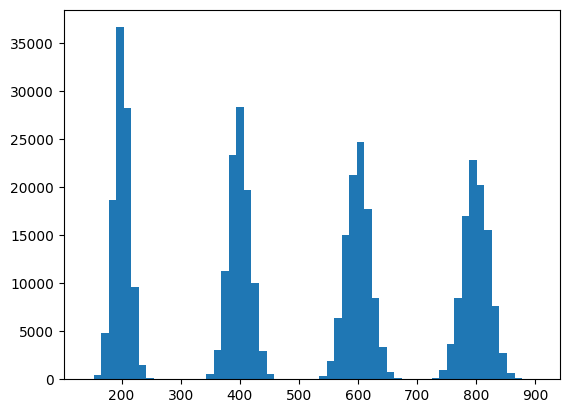

In [57]:
def random_partition(rel_probabilities: npt.ArrayLike, count: int) -> npt.NDArray:
    out = []
    rel_probabilities = np.array(rel_probabilities)
    rel_probabilities /= rel_probabilities.sum()
    probability_accum = 0
    for probability in rel_probabilities[:-1]:
        p = np.clip(probability/(1-probability_accum),0,1)
        take = np.random.binomial(count,p)
        probability_accum += probability
        count -= take
        out.append(take)
    out.append(count)
    return np.array(out)
    
plt.hist(np.array([random_partition([1.0,2,3,4],2000) for _ in range(100000)]).flatten(), bins=60)

In [84]:
for x in range(100000):
    X = np.random.randint(1000)
    if np.sum(random_partition(np.random.random(10),X))-X != 0:
        raise

(array([   3.,    5.,   25.,   66.,  150.,  319.,  511.,  806., 1138.,
        1349., 1486., 1278., 1120.,  786.,  488.,  268.,  129.,   54.,
          12.,    7.]),
 array([0.49981101, 0.49982925, 0.4998475 , 0.49986574, 0.49988398,
        0.49990223, 0.49992047, 0.49993871, 0.49995696, 0.4999752 ,
        0.49999344, 0.50001169, 0.50002993, 0.50004818, 0.50006642,
        0.50008466, 0.50010291, 0.50012115, 0.50013939, 0.50015764,
        0.50017588]),
 <BarContainer object of 20 artists>)

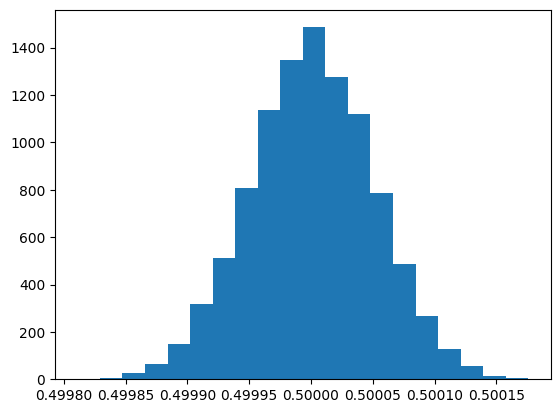

In [49]:
# plt.hist(np.random.binomial(100,0.5,size=(10_000_000))/100, bins=20)
plt.hist(np.random.binomial(100_000_000,0.5,size=10000)/100_000_000, bins=20)
# plt.xlim(0,1)

In [ ]:
plt.hist(np.sum(np.random.random((10_000_000,100))>0.5,axis=1)/100,bins=20)
plt.xlim(0,1)

MemoryError: Unable to allocate 74.5 GiB for an array with shape (1000, 10000000) and data type float64